In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import csv

#----------------------setting---------------------------#
ecg_filename = "time_ecg_rpeak_yeopdata"
rr_filename = "rrinterval_hrate_yeopdata"
#--------------------------------------------------------#

#ecg_ values
ecg_header = []
ecg_time = []
ecg_code = []
rpeak_time = []
rpeak_code = []
peak_index = []

#rr_values
rr_header = []
rr_index = []
rr_interval = []
hr_data = []

In [2]:
def read_ecg_from_csv(ecg_filename):
    filename = "data/"+ecg_filename+".csv"
    with open (filename,'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        ecg_header.append(reader.next())
        for row in reader:
            ecg_time.append(row[0])
            ecg_code.append(int(row[1]))
            rpeak_time.append(row[2])
            rpeak_code.append(row[3])
            if row[3] != "0":
                peak_index.append(row)

In [3]:
def read_rr_from_csv(rr_filename):
    filename = "data/"+rr_filename+".csv"
    with open (filename,'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        rr_header.append(reader.next())
        for row in reader:
            rr_index.append(int(row[0]))
            rr_float = float(row[1])
            rr_interval.append(rr_float)
            hr_data.append((60*1000)/rr_float)

In [4]:
def get_hr_data(rr_interval) :
    for i in rr_interval:
        rr_interval[i] = int(rr_interval[i])
        hr_data.append = (60*1000)/rr_interval[i]

In [5]:
read_ecg_from_csv(ecg_filename)
read_rr_from_csv(rr_filename)

In [6]:
print("peak_point_number : " + str(len(peak_index))+
      "\necg_data_number : "+str(len(ecg_time))+
     "\nrr_index_number : "+str(len(rr_index))+
     "\necg_header : "+ str(ecg_header)+
     "\nrr_header : "+ str(rr_header))

peak_point_number : 2865
ecg_data_number : 587648
rr_index_number : 2863
ecg_header : [['Time(H:M:S) - ECG', 'Code - ECG', 'Time(H:M:S) - R-Peak', 'Code - R-Peak']]
rr_header : [['History Index - RR', 'R-R Interval(ms) - RR', '']]


In [7]:
def notchfilter(ecg_code):
    fft_ecg = np.fft.fft(ecg_code)
    for i in range(len(fft_ecg)):
        if 590<i<620 or 880<i<910: 
            fft_ecg[i]=0
    return np.fft.ifft(fft_ecg)

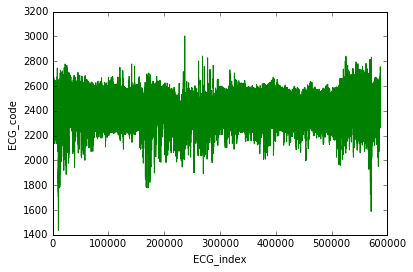

In [8]:
ecg_index = []

freq_filtered_data = notchfilter(ecg_code)
for i in xrange(len(ecg_time)):
    ecg_index.append([i])

plt.plot(ecg_index , ecg_code,'g-')
plt.xlabel('ECG_index')
plt.ylabel('ECG_code')
plt.show()

In [9]:
from biosppy.signals import ecg
hr_from_ecg = ecg.ecg(signal = ecg_code,sampling_rate =1000.show=True )

SyntaxError: invalid syntax (<ipython-input-9-db47871e1142>, line 2)

In [ ]:
plt.plot(rr_index,hr_data,'g-')
plt.xlabel('RR_interval_index')
plt.ylabel('HR_data( 60*1000 msec / RR-interval)')
plt.ylim(40.0, 130.0)
plt.show()

In [ ]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def to_ndarray(list):
    lgt = len(list)
    x = np.zeros((1,lgt),dtype ='float')
    for i in range(0,lgt):
        x[0,i]=list[i]
    return x

# for test y = 1/x, switch Code <-->Markdown
rr_index = np.linspace(0.2, 0.8, 101)
hr_data = map(lambda x: 1/x, rr_index)
#copy & paste below data : x_test = np.linspace(0.2, 0.8, 10*len(rr_index))
#backup_code : x_test = np.linspace(0 ,len(rr_index),10*len(rr_index))

In [ ]:
x_data = to_ndarray(rr_index)
y_data = to_ndarray(hr_data)

In [ ]:
#setting parameters
hiddenDim = 10
training_step = 2001
rate = 0.01

In [ ]:
W = weight_variable([hiddenDim,1])
b = bias_variable([hiddenDim,1])

W2 = weight_variable([1,hiddenDim])
b2 = bias_variable([1])

X = tf.placeholder("float",[1,None])

hidden = tf.nn.sigmoid(tf.matmul(W,X)+b)
regression = tf.matmul(W2,hidden) + b2

loss = tf.reduce_mean(tf.square( y_data - regression))

step = tf.Variable(0,trainable=False)
#rate = tf.train.exponential_decay(0.15, step,1, 0.9999)

optimizer = tf.train.AdamOptimizer(rate)
train = optimizer.minimize(loss, global_step = step)

In [ ]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

start_time = time.time()
for step in xrange(training_step):
    train.run({X: x_data},sess)
    if step % 100 == 0:
        print step, loss.eval({X: x_data},sess)
        
excute_time = time.time() - start_time

In [ ]:
x_test = np.linspace(0 ,len(rr_index),10*len(rr_index))
y_test = regression.eval({X:to_ndarray(x_test)},sess)

plt.plot(rr_index,hr_data,'y-')
plt.plot(x_test,y_test.transpose().tolist(),'r-')
plt.show()
print "\nSample number : ", len(rr_index) -1 
print "learning rates : ", rate
print "Training steps : ", training_step -1
print "Hidden dimentions : ", hiddenDim
print "Final loss value : ", loss.eval({X: x_data},sess)
print "Excute time : ", excute_time , " sec"